### INTRO

In [ ]:
#INTRO
print('Hello World')
#suma y resta
print(1+2)
print(4-1)
#division y multiplicacion
print(24*56)
print(3234/52)
#Potencia
print(34**3)

#guarda valores en una variable
a=56
b=45
#halla a^b
print(a**b)


#crear un array con numpy
import numpy as np

datos=np.array([[2,4,5,6,7],[2,5,6,6,9],[4,2,3,56,78]])

print(datos)

#crea un vector con pandas
import pandas as pd
df=pd.DataFrame(datos)
df


Hello World
3
3
1344
62.19230769230769
39304
4660808027410506132900915088997417305944355117847144307414511042169984019070976
[[ 2  4  5  6  7]
 [ 2  5  6  6  9]
 [ 4  2  3 56 78]]


,0,1,2,3,4
0,2,4,5,6,7
1,2,5,6,6,9
2,4,2,3,56,78


In [ ]:
#Aqui se instala la libreria de mapas 
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install basemap-data
!apt install proj-bin libproj-dev libgeos-dev
!pip install Basemap
#!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.9.1-1~focal0).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 37.0 MB/s eta 0:00:00


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.9.1-1~focal0).
libproj-dev is already the newest version (7.2.1-1~focal0).
libproj-dev set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 170 kB of archives.
After this operation, 485 kB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal/main amd64 proj-bin amd64 7.2.1-1~focal0 [170 kB]
Fetched 170 kB in 1s (302 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 122518 files and directories currently installed.)
Preparing to unpack .../proj-bin_7.2.1-1~focal0_amd64.deb ...
Unpacking proj-bin (7.2.1-1~focal0) ...
Setting up proj-bin (7.2.1-1~focal0) ...
Processing triggers for man-db (2.9.1-1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/co

In [ ]:
#Aqui se instala la version compatible para google colab
!pip install pyproj==1.9.6
from mpl_toolkits import basemap
print(basemap.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pyproj
  Running setup.py clean for pyproj
Failed to build pyproj
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.4.1
    Uninstalling pyproj-3.4.1:
      Successfully uninstalled pyproj-3.4.1
  error: subprocess-exited-with-error
  
  × Running setup.py install for pyproj did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Running setup.py install for pyproj ... error
  Ro

#Luego de instalar las librerias correspondientes se reinicia dando click en 'RESTART RUNTIME' y se prosigue con el codigo

## **Codigo para graficar la clorofila en el mar peruano**

Consideraciones del código:

*   El tiempo debe estar en días, y los meses deben comenzar siempre en el dia 1 i.e (1 de mayo de 2021)
*   Los datos a usar deben ser de CMEMS y en formato .nc
*   Se debe crear una carpeta llamada CLorofila donde se subiran 2 archivos: mapa_puertos.mat y el archivo nc de clorofila i.e (mayo_2021_pre.nc)
*   La funcion usada para hallar el promedio semanal es np.nanmean

In [ ]:
#primero hacemos la descarga de los datos de CMEMS 
#subirlos a la carpeta clorofila
!cd Clorofila
!ls
#con el comando !cd colocamos la ruta, en este caso Clorofila


/bin/bash: line 0: cd: Clorofila: No such file or directory
'CHL ABRIL23 1-24'   mapa_puertos.mat   sample_data


Importa las librerias antes de comenzar el codigo

In [ ]:

import os
from netCDF4 import Dataset
from datetime import date
import numpy as np
#from oceans.colormaps import cm
import matplotlib.pyplot as plt
import pandas as pd


ModuleNotFoundError: ignored

In [ ]:
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/clorofila

[Errno 2] No such file or directory: '/content/drive/MyDrive/clorofila'
/content


In [ ]:
#sacamos la ruta dando click derecho copiar ruta sobre el archivo NC que subimos
#path0="/content/CHL SEPTIEMBRE 22"
fn="/content/CHL JULIO 22"
data=Dataset(fn)


In [ ]:
#vemos las caracteristicas de nuestro archivo NC
data.variables

{'CHL_uncertainty': <class 'netCDF4._netCDF4.Variable'>
 int16 CHL_uncertainty(time, lat, lon)
     _FillValue: -32768
     long_name: Chlorophyll-a concentration - Uncertainty estimation
     units: %
     coverage_content_type: qualityInformation
     coordinates: time lat lon
     scale_factor: 0.01
     missing_value: -32768
     _ChunkSizes: [  1 256 256]
 unlimited dimensions: 
 current shape = (24, 601, 601)
 filling on, 'CHL': <class 'netCDF4._netCDF4.Variable'>
 float32 CHL(time, lat, lon)
     _FillValue: -999.0
     input_files_reprocessings: Processors versions: OLCIA 07.02+07.02NR/VIIRSJ1 2018.0.1QL+2018.0.1QLP/OLCIB 07.02+07.02NR
     type: surface
     ancillary_variables: flags CHL_uncertainty
     standard_name: mass_concentration_of_chlorophyll_a_in_sea_water
     long_name: Chlorophyll-a concentration - Mean of the binned pixels
     units: milligram m-3
     coverage_content_type: modelResult
     coordinates: time lat lon
     missing_value: -999.0
     _ChunkSizes

In [ ]:
#variables de long, latitud, tiempo
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
time = data.variables['time'][:]

print(time)

[44748. 44749. 44750. 44751. 44752. 44753. 44754. 44755. 44756. 44757.
 44758. 44759. 44760. 44761. 44762. 44763. 44764. 44765. 44766. 44767.
 44768. 44769. 44770. 44771.]


In [ ]:
#encontrando el dia 1 o dia de creacion
creation_day = data.variables['time'].units[11:21]
#print('El dia de creacion fue ',creation_day)
yy=int(creation_day[:4]); mm=int(creation_day[5:7]); dd=int(creation_day[8:10])  
print('año de creacion:',yy); print('mes de creacion:',mm); print('dia de creacion:',dd)

año de creacion: 1900
mes de creacion: 1
dia de creacion: 1


In [ ]:
#fecha=date.fromordinal(int(time+np.array(date.toordinal(date(yy,mm,dd)))))

fecha=time+np.array(date.toordinal(date(yy,mm,dd)))
#Fecha en forma de vector de tiempo
fecha

masked_array(data=[738344., 738345., 738346., 738347., 738348., 738349.,
                   738350., 738351., 738352., 738353., 738354., 738355.,
                   738356., 738357., 738358., 738359., 738360., 738361.,
                   738362., 738363., 738364., 738365., 738366., 738367.],
             mask=False,
       fill_value=1e+20)

In [ ]:
#previsualizacion de los datos para el dia 1 del mes seleccionado
clorofila = data.variables['CHL'][:][0,:,:]
clorofila

masked_array(
  data=[[0.10659182816743851, 0.10888335853815079, 0.11777617037296295,
         ..., --, --, --],
        [0.09880051016807556, 0.10764869302511215, 0.10197321325540543,
         ..., --, --, --],
        [0.10592955350875854, 0.10764869302511215, 0.10931437462568283,
         ..., --, --, --],
        ...,
        [0.07638968527317047, 0.07692869752645493, 0.07759784907102585,
         ..., --, --, --],
        [0.07645849138498306, 0.07736664265394211, 0.07876531034708023,
         ..., --, --, --],
        [0.07820400595664978, 0.07859911769628525, 0.07893802970647812,
         ..., --, --, --]],
  mask=[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],
  fill_value=-999.0,
 

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [ ]:
area_centro=[-90,-65, -20, 5]
mp = Basemap(projection ='merc',
             llcrnrlon=int(area_centro[0]),
             llcrnrlat=int(area_centro[2]),
             urcrnrlon=int(area_centro[1]),
             urcrnrlat=int(area_centro[3]),
             resolution='i')

loni,lati = np.meshgrid(lon,lat)



<ipython-input-25-f4a6b1141a2b>:4: RuntimeWarning: invalid value encountered in log10
  cs = mp.pcolormesh(x, y, np.log10(clorofila), vmin=np.log10(0.01), vmax=np.log10(60),  cmap='jet', shading='flat')


TypeError: ignored

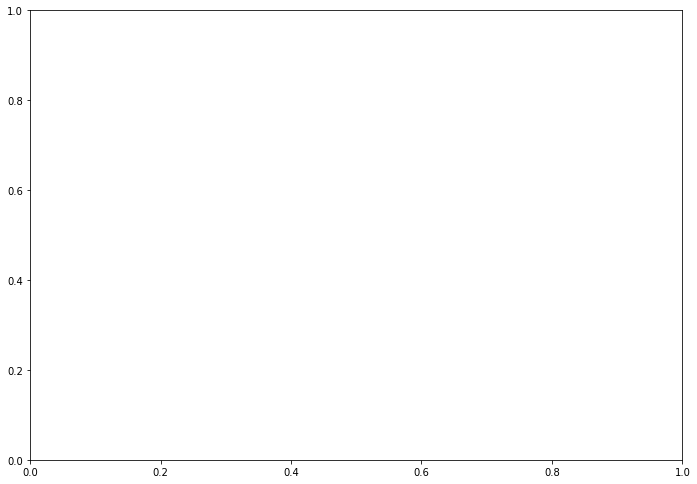

In [ ]:
fig=plt.figure(figsize=(11.69,8.27))
x,y = mp(loni,lati)

cs = mp.pcolormesh(x, y, np.log10(clorofila), vmin=np.log10(0.01), vmax=np.log10(60),  cmap='jet', shading='flat')
cb = plt.colorbar(cs, pad=0.02, orientation='vertical', fraction=0.1)

cb.set_ticks(np.log10([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60]))
cb.set_ticklabels([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60])

mp.drawcoastlines()
mp.drawparallels(np.arange(int(min(lat)),int(max(lat)),2),labels=[1,0,0,0],linewidth='0.1')
mp.drawmeridians(np.arange(np.round(min(lon)),np.round(max(lon)),5),labels=[0,0,0,1],linewidth='0.1')
plt.show()


# Puertos del Peru

In [ ]:
##Puertos
import scipy.io
#puertos = scipy.io.loadmat('/content/sample_data/CHL/mapa_puertos.mat')
puertos = scipy.io.loadmat('/content/mapa_puertos.mat')
lonp=puertos['lonpuertos']
latp=puertos['latpuertos']
lon_name=puertos['lonpuertos_text']
lat_name=puertos['latpuertos_text']
nombres_puertos=puertos['puertoselect']
sudamerica=puertos['sudamerica']

<ipython-input-27-b9211a9a9480>:8: RuntimeWarning: invalid value encountered in log10
  cs = mp.pcolormesh(x, y, np.log10(clorofila), vmin=np.log10(0.01), vmax=np.log10(60),  cmap='jet', shading='flat')


TypeError: ignored

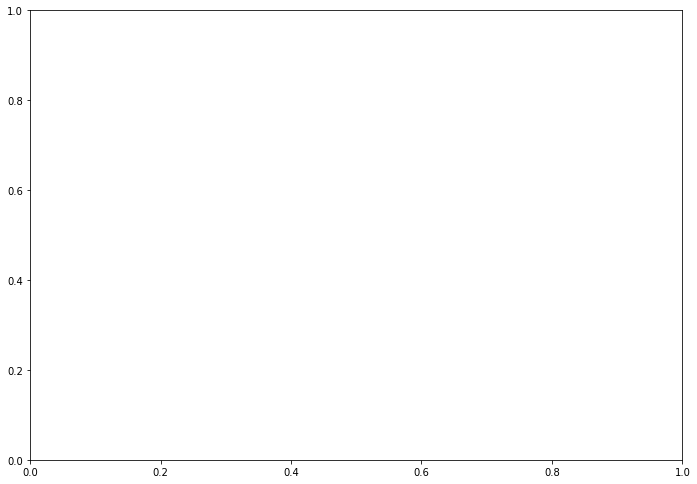

In [ ]:
df=pd.DataFrame(nombres_puertos)

fig=plt.figure(figsize=(11.69,8.27))
x,y = mp(loni,lati)
x2,y2 = mp(lonp,latp)
x3,y3 = mp(lon_name,lat_name)

cs = mp.pcolormesh(x, y, np.log10(clorofila), vmin=np.log10(0.01), vmax=np.log10(60),  cmap='jet', shading='flat')
cb = plt.colorbar(cs, pad=0.02, orientation='vertical', fraction=0.1)
cc = plt.plot(x2, y2, 'o', color='black',markersize=2);
for ii in range(0,len(df)):
  plt.text(x3[ii], y3[ii], df[0][ii],fontsize=8)

cb.set_ticks(np.log10([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60]))
cb.set_ticklabels([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60])

mp.drawcoastlines()
mp.drawparallels(np.arange(int(min(lat)),int(max(lat)),2),labels=[1,0,0,0],linewidth='0.1')
mp.drawmeridians(np.arange(np.round(min(lon)),np.round(max(lon)),5),labels=[0,0,0,1],linewidth='0.1')



In [ ]:
#plt.plot(lonp, latp, 'o', color='blue',markersize=2);


# Datos Diarios de Clorofila

### Ploteamos los datos de Clorofila de manera diaria para observar los cambios de distribucion de clorofila debido a corrientes, viento, etc

<ipython-input-29-2d06fa805d5a>:11: RuntimeWarning: invalid value encountered in log10
  cs = mp.pcolormesh(x, y, np.log10(data.variables['CHL'][:][kk,:,:]), vmin=np.log10(0.01), vmax=np.log10(60),  cmap='jet', shading='flat')


TypeError: ignored

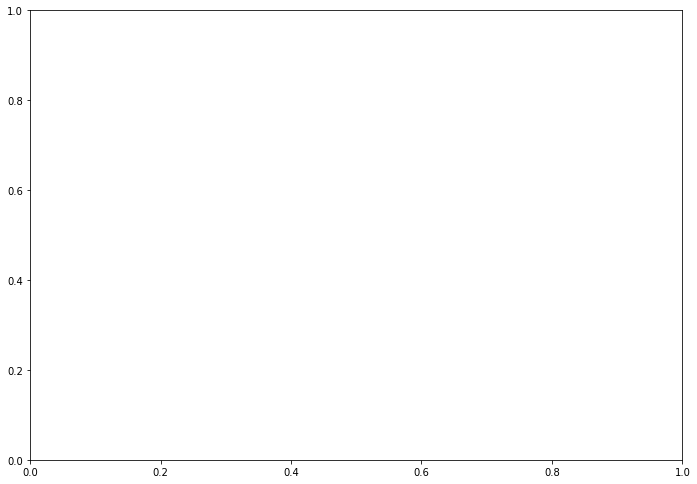

In [ ]:
import time
import datetime

for kk in range(0,len(fecha)):
  dia=datetime.date.fromordinal(int(fecha[kk]))
  fig=plt.figure(figsize=(11.69,8.27))
  plt.clf()
  x,y = mp(loni,lati)
  x2,y2 = mp(lonp,latp)
  x3,y3 = mp(lon_name,lat_name)
  cs = mp.pcolormesh(x, y, np.log10(data.variables['CHL'][:][kk,:,:]), vmin=np.log10(0.01), vmax=np.log10(60),  cmap='jet', shading='flat')
  cb = plt.colorbar(cs, pad=0.02, orientation='vertical', fraction=0.1)
  cc = plt.plot(x2, y2, 'o', color='blue',markersize=2);
  for ii in range(0,len(df)):
    plt.text(x3[ii], y3[ii], df[0][ii],fontsize=6)

  cb.set_ticks(np.log10([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60]))
  cb.set_ticklabels([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60])

  mp.drawcoastlines()
  mp.drawparallels(np.arange(int(min(lat)),int(max(lat)),2),labels=[1,0,0,0],linewidth='0.1')
  mp.drawmeridians(np.arange(np.round(min(lon)),np.round(max(lon)),5),labels=[0,0,0,1],linewidth='0.1')

  plt.text(0.6, 0.78, str(dia.strftime("%A %d %B %Y")), fontsize=13, transform=plt.gcf().transFigure)
  plt.pause(0.5)
  

plt.show()

# Calculo de las semanas

In [ ]:

dt_inicio=datetime.date.fromordinal(int(fecha[0]))
dt_fin=datetime.date.fromordinal(int(fecha[-1]))

print('fecha de inicio: ', dt_inicio)
print('fecha ultima: ', dt_fin)

#se considera una semana como 7 días las 3 primeras semanas y la 4ta hasta donde alcance

fecha de inicio:  2023-02-01
fecha ultima:  2023-02-20


In [ ]:
ultimo_dia=int(dt_fin.day)-1
type(ultimo_dia)
#verificar que sea el ultimo dia sea tipo integer(int)

int

El cálculo del promedio semanal de clorofila se hizo de acuerdo a los 7 dias de la semana, por ejemplo en la primera linea de codigo : 'sem1=np.nanmean(data.variables['CHL'][:][0:6,:,:],axis=0)' , nos indica que se tomaran todos los valores de CHL durante el dato 0 al 6, esto representa los 7 días de la semana, ya que Python empieza a contar desde el 0 a diferencia de otros lenguajes como MATLAB que cuentan desde el 1

In [ ]:
sem1=np.nanmean(data.variables['CHL'][:][0:6,:,:],axis=0)
sem2=np.nanmean(data.variables['CHL'][:][7:13,:,:],axis=0)
sem3=np.nanmean(data.variables['CHL'][:][14:20,:,:],axis=0)
sem4=np.nanmean(data.variables['CHL'][:][21:ultimo_dia,:,:],axis=0)


El tiempo durante las semanas, se tomará el último dia de la semana para representar la semana, es decir si la fecha en el grafico es 7 de mayo 2021, representa un promedio de la semana desde el 1 al 7 de mayo.

In [ ]:
fecha_sem1=datetime.date.fromordinal(int(fecha[6]))
fecha_sem2=datetime.date.fromordinal(int(fecha[13]))
fecha_sem3=datetime.date.fromordinal(int(fecha[20]))
fecha_sem4=datetime.date.fromordinal(int(fecha[ultimo_dia]))

print(fecha_sem1.strftime("%A %d %B %Y"))
print(fecha_sem2.strftime("%A %d %B %Y"))
print(fecha_sem3.strftime("%A %d %B %Y"))
print(fecha_sem4.strftime("%A %d %B %Y"))


IndexError: ignored

TypeError: ignored

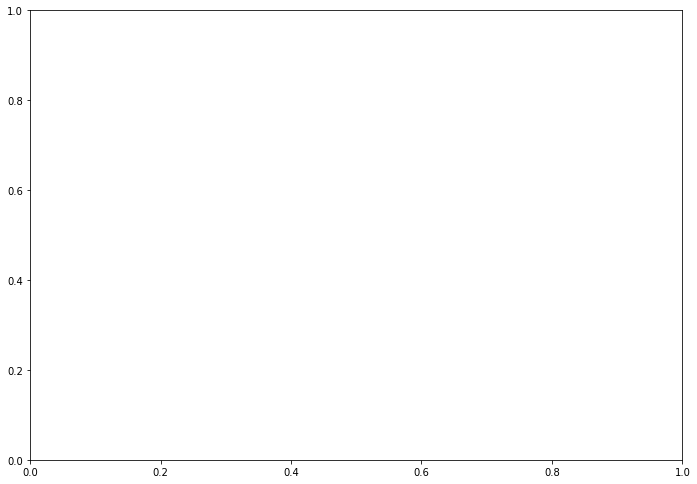

In [ ]:
fig=plt.figure(figsize=(11.69,8.27))
x,y = mp(loni,lati)
x2,y2 = mp(lonp,latp)
x3,y3 = mp(lon_name,lat_name)

cs = mp.pcolormesh(x, y, np.log10(sem1), vmin=np.log10(0.01), vmax=np.log10(60),  cmap='jet', shading='flat')
cb = plt.colorbar(cs, pad=0.02, orientation='vertical', fraction=0.1)
cc = plt.plot(x2, y2, 'o', color='blue',markersize=2);
for ii in range(0,len(df)):
  plt.text(x3[ii], y3[ii], df[0][ii],fontsize=7)

cb.set_ticks(np.log10([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60]))
cb.set_ticklabels([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60])

mp.drawcoastlines()
mp.drawparallels(np.arange(int(min(lat)),int(max(lat)),2),labels=[1,0,0,0],linewidth='0.1')
mp.drawmeridians(np.arange(np.round(min(lon)),np.round(max(lon)),5),labels=[0,0,0,1],linewidth='0.1')

plt.text(0.6, 0.78, str(fecha_sem1.strftime("%A %d %B %Y")), fontsize=13, transform=plt.gcf().transFigure)

Ahora haremos el subplot para tener las 4 semanas en una imagen

In [ ]:
from matplotlib import rcParams
from matplotlib.ticker import MultipleLocator

Primero probamos con 2 paneles

TypeError: ignored

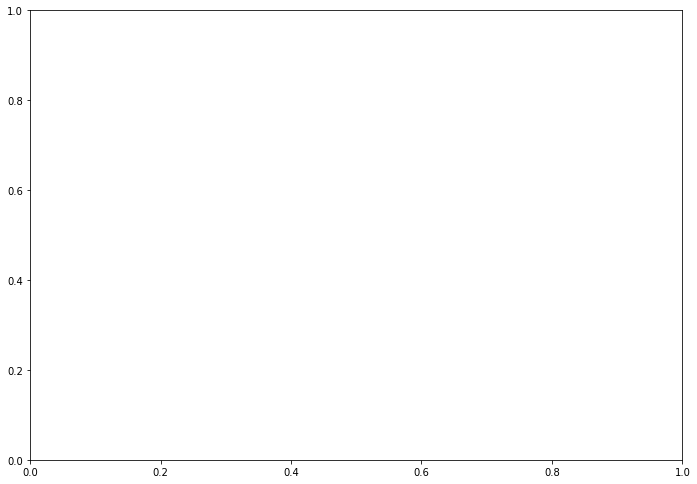

In [ ]:
# 2-panel plot, oriented vertically, colorbar on bottom.

rcParams['figure.subplot.hspace'] = 0.4 # more height between subplots
rcParams['figure.subplot.wspace'] = 0.5 # more width between subplots

# create new figure
#fig=plt.figure()
# panel 1
fig=plt.figure(figsize=(11.69,8.27))
x,y = mp(loni,lati)
x2,y2 = mp(lonp,latp)
x3,y3 = mp(lon_name,lat_name)

cs = mp.pcolormesh(x, y, np.log10(sem1), vmin=np.log10(0.01), vmax=np.log10(60),  cmap='jet', shading='flat')
cb = plt.colorbar(cs, pad=0.02, orientation='vertical', fraction=0.1)
cc = plt.plot(x2, y2, 'o', color='blue',markersize=2);
for ii in range(0,len(df)):
  plt.text(x3[ii], y3[ii], df[0][ii],fontsize=7)

cb.set_ticks(np.log10([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60]))
cb.set_ticklabels([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60])

mp.drawcoastlines()
mp.drawparallels(np.arange(int(min(lat)),int(max(lat)),2),labels=[1,0,0,0],linewidth='0.1')
mp.drawmeridians(np.arange(np.round(min(lon)),np.round(max(lon)),5),labels=[0,0,0,1],linewidth='0.1')

plt.text(0.65, 0.78, str(fecha_sem1.strftime("%A %d %B %Y")), fontsize=13, transform=plt.gcf().transFigure)


# panel 2
fig=plt.figure(figsize=(11.69,8.27))
x,y = mp(loni,lati)
x2,y2 = mp(lonp,latp)
x3,y3 = mp(lon_name,lat_name)

cs = mp.pcolormesh(x, y, np.log10(sem2), vmin=np.log10(0.01), vmax=np.log10(60),  cmap='jet', shading='flat')
cb = plt.colorbar(cs, pad=0.02, orientation='vertical', fraction=0.1)
cc = plt.plot(x2, y2, 'o', color='blue',markersize=2);
for ii in range(0,len(df)):
  plt.text(x3[ii], y3[ii], df[0][ii],fontsize=7)

cb.set_ticks(np.log10([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60]))
cb.set_ticklabels([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60])

mp.drawcoastlines()
mp.drawparallels(np.arange(int(min(lat)),int(max(lat)),2),labels=[1,0,0,0],linewidth='0.1')
mp.drawmeridians(np.arange(np.round(min(lon)),np.round(max(lon)),5),labels=[0,0,0,1],linewidth='0.1')

plt.text(0.6, 0.78, str(fecha_sem2.strftime("%A %d %B %Y")), fontsize=13, transform=plt.gcf().transFigure)




In [ ]:
str(fecha_sem2.strftime("%A %d %B %Y"))

'Tuesday 14 February 2023'

Ahora los 4 paneles

TypeError: ignored

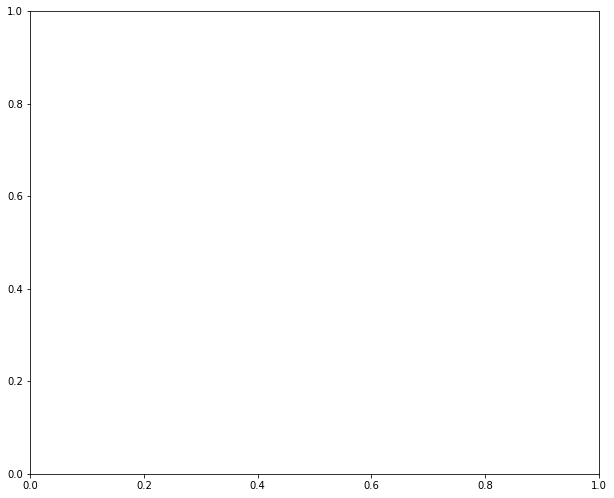

In [ ]:
rcParams['figure.subplot.left'] = 0.1   # move left edge of subplot over a bit
rcParams['figure.subplot.right'] = 0.9
rcParams['figure.subplot.top'] = 0.8
rcParams['figure.subplot.hspace'] = 0.1 # more height between subplots
rcParams['figure.subplot.wspace'] = 0.025 # more width between subplots

# panel 1
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(221)
x,y = mp(loni,lati)
x2,y2 = mp(lonp,latp)
x3,y3 = mp(lon_name,lat_name)

cs = mp.pcolormesh(x, y, np.log10(sem1), vmin=np.log10(0.01), vmax=np.log10(60),  cmap='jet', shading='flat')
cb = plt.colorbar(cs, pad=0.02, orientation='vertical', fraction=0.1)
cb.set_label('Clorofila (mg/m^3)')
cc = plt.plot(x2, y2, 'o', color='blue',markersize=2);
for ii in range(0,len(df)):
  plt.text(x3[ii], y3[ii], df[0][ii],fontsize=7)

cb.set_ticks(np.log10([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60]))
cb.set_ticklabels([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60])

mp.drawcoastlines()
mp.drawparallels(np.arange(int(min(lat)),int(max(lat)),2),labels=[1,0,0,0],linewidth='0.1')
mp.drawmeridians(np.arange(np.round(min(lon)),np.round(max(lon)),5),labels=[0,0,0,1],linewidth='0.1')

plt.text(0.31, 0.75, str(fecha_sem1.strftime("%A %d %B %Y")), fontsize=14, transform=plt.gcf().transFigure)


# panel 2
ax = fig.add_subplot(222)
x,y = mp(loni,lati)
x2,y2 = mp(lonp,latp)
x3,y3 = mp(lon_name,lat_name)

cs = mp.pcolormesh(x, y, np.log10(sem2), vmin=np.log10(0.01), vmax=np.log10(60),  cmap='jet', shading='flat')
cb = plt.colorbar(cs, pad=0.02, orientation='vertical', fraction=0.1)
cc = plt.plot(x2, y2, 'o', color='blue',markersize=2);
for ii in range(0,len(df)):
  plt.text(x3[ii], y3[ii], df[0][ii],fontsize=7)

cb.set_ticks(np.log10([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60]))
cb.set_ticklabels([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60])
cb.set_label('Clorofila (mg/m^3)')
mp.drawcoastlines()
mp.drawparallels(np.arange(int(min(lat)),int(max(lat)),2),labels=[1,0,0,0],linewidth='0.1')
mp.drawmeridians(np.arange(np.round(min(lon)),np.round(max(lon)),5),labels=[0,0,0,1],linewidth='0.1')

plt.text(0.71, 0.75, str(fecha_sem2.strftime("%A %d %B %Y")), fontsize=14, transform=plt.gcf().transFigure)

#panel 3
ax = fig.add_subplot(223)

x,y = mp(loni,lati)
x2,y2 = mp(lonp,latp)
x3,y3 = mp(lon_name,lat_name)

cs = mp.pcolormesh(x, y, np.log10(sem3), vmin=np.log10(0.01), vmax=np.log10(60),  cmap='jet', shading='flat')
cb = plt.colorbar(cs, pad=0.02, orientation='vertical', fraction=0.1)
cb.set_label('Clorofila (mg/m^3)')
cc = plt.plot(x2, y2, 'o', color='blue',markersize=2);
for ii in range(0,len(df)):
  plt.text(x3[ii], y3[ii], df[0][ii],fontsize=7)

cb.set_ticks(np.log10([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60]))
cb.set_ticklabels([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60])

mp.drawcoastlines()
mp.drawparallels(np.arange(int(min(lat)),int(max(lat)),2),labels=[1,0,0,0],linewidth='0.1')
mp.drawmeridians(np.arange(np.round(min(lon)),np.round(max(lon)),5),labels=[0,0,0,1],linewidth='0.1')

plt.text(0.31, 0.4, str(fecha_sem3.strftime("%A %d %B %Y")), fontsize=14, transform=plt.gcf().transFigure)

#panel 4
ax = fig.add_subplot(224)

x,y = mp(loni,lati)
x2,y2 = mp(lonp,latp)
x3,y3 = mp(lon_name,lat_name)

cs = mp.pcolormesh(x, y, np.log10(sem4), vmin=np.log10(0.01), vmax=np.log10(60),  cmap='jet', shading='flat')
cb = plt.colorbar(cs, pad=0.02, orientation='vertical', fraction=0.1)
cb.set_label('Clorofila (mg/m^3)')
cc = plt.plot(x2, y2, 'o', color='blue',markersize=2);
for ii in range(0,len(df)):
  plt.text(x3[ii], y3[ii], df[0][ii],fontsize=7)

cb.set_ticks(np.log10([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60]))
cb.set_ticklabels([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60])

mp.drawcoastlines()
mp.drawparallels(np.arange(int(min(lat)),int(max(lat)),2),labels=[1,0,0,0],linewidth='0.1')
mp.drawmeridians(np.arange(np.round(min(lon)),np.round(max(lon)),5),labels=[0,0,0,1],linewidth='0.1')

plt.text(0.71, 0.4, str(fecha_sem4.strftime("%A %d %B %Y")), fontsize=14, transform=plt.gcf().transFigure)

#Finalmente se debe guardar la figura como png
plt.savefig('/content/Clorofila'+'-'+str(fecha_sem2.strftime("%A %d %B %Y"))+'.png',
   format='png', dpi=600, transparent=False)

#Hacemos una copia para el drive compartido
#plt.savefig('/content/drive/MyDrive/clorofila/'+'clorofila-'+str(fecha_sem2.strftime("%A %d %B %Y"))+'.png',
#   format='png', dpi=600, transparent=False)


In [ ]:
#import scipy.io as sio
#mat=sio.loadmat('file.mat')# load mat-file
#mdata = mat['myVar']  # variable in mat file 
#ndata = {n: mdata[n][0,0] for n in mdata.dtype.names}
#Columns = [n for n, v in ndata.items() if v.size == 1]
#d=dict((c, ndata[c][0]) for c in Columns)
#df=pd.DataFrame.from_dict(d)
#display(df)

#plt.plot(lon,lat,color='black', linestyle='dashed',linewidth=0.1,marker='o',markerfacecolor='green',markersize=5)
#plt.xlabel('Longitud')
#plt.ylabel('Latitud')
#plt.title('2020-01 to 2021-03-27 Floats trajectory in 112ºW-108ºW / 1ºN-1ºS')

In [ ]:
#plt.plot(sudamerica['X'],sudamerica['Y'])
#plt.plot(sudamerica['X'][0],sudamerica['Y'][0])
#!pip install fiona
#import fiona
#shape = fiona.open(sudamerica)